<a href="https://colab.research.google.com/github/sdmadhav/ML-Project/blob/main/COVID_19_cases_EDA_%26_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
!pip install catboost
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


# Read Data

In [2]:
# !kaggle datasets download -d ironwolf404/who-covid-19-cases-dataset

# !unzip who-covid-19-cases-dataset.zip


In [3]:
df = pd.read_csv("WHO COVID-19 cases.csv")
df.sample(20)

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
15916,2021-01-31,EE,Estonia,Europe,EURO,3604.0,49794,42.0,494
37620,2020-11-08,NZ,New Zealand,Oceania,WPRO,23.0,1627,NaN,25
51881,2022-12-11,TJ,Tajikistan,Asia,EURO,NaN,17786,NaN,125
1752,2020-11-08,AG,Antigua and Barbuda,North America,AMRO,3.0,130,NaN,3
32146,2023-07-02,MY,Malaysia,Asia,WPRO,NaN,5112601,2.0,37149
17236,2023-01-01,FJ,Fiji,Oceania,WPRO,48.0,68750,NaN,881
24603,2023-11-26,XXJ,International conveyance (Diamond Princess),Uncategorized,OTHER,NaN,712,NaN,13
14523,2022-06-12,DO,Dominican Republic,North America,AMRO,4665.0,590764,3.0,4380
39588,2021-02-28,PS,"occupied Palestinian territory, including east...",Asia,EMRO,11563.0,206438,64.0,2236
36354,2024-08-25,MM,Myanmar,Asia,SEARO,38.0,642962,NaN,19494


# Check The data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      58560 non-null  object 
 1   Country_code       58316 non-null  object 
 2   Country            58560 non-null  object 
 3   Continent          58560 non-null  object 
 4   WHO_region         54168 non-null  object 
 5   New_cases          39260 non-null  float64
 6   Cumulative_cases   58560 non-null  int64  
 7   New_deaths         25084 non-null  float64
 8   Cumulative_deaths  58560 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 4.0+ MB


In [5]:
df.isna().sum()

,0
Date_reported,0
Country_code,244
Country,0
Continent,0
WHO_region,4392
New_cases,19300
Cumulative_cases,0
New_deaths,33476
Cumulative_deaths,0


In [6]:
print("Missing Values: ", df.isna().sum().sum())
print("Duplicate Values: ", df.duplicated().sum())

Missing Values:  57412
Duplicate Values:  0


# Data cleaning

In [7]:
df[df["Country_code"].isna()]

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
36356,2020-01-05,NaN,Namibia,Africa,AFRO,NaN,0,NaN,0
36357,2020-01-12,NaN,Namibia,Africa,AFRO,NaN,0,NaN,0
36358,2020-01-19,NaN,Namibia,Africa,AFRO,NaN,0,NaN,0
36359,2020-01-26,NaN,Namibia,Africa,AFRO,NaN,0,NaN,0
36360,2020-02-02,NaN,Namibia,Africa,AFRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...
36595,2024-08-04,NaN,Namibia,Africa,AFRO,1.0,172533,NaN,4108
36596,2024-08-11,NaN,Namibia,Africa,AFRO,7.0,172540,NaN,4108
36597,2024-08-18,NaN,Namibia,Africa,AFRO,9.0,172549,NaN,4108
36598,2024-08-25,NaN,Namibia,Africa,AFRO,NaN,172549,NaN,4108


In [8]:
df.loc[(df["Country"]=="Namibia") & (df["Country_code"].isna()), ['Country_code']] = 'NAM'

In [9]:
df[df["Country"]=="Namibia"]

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
36356,2020-01-05,NAM,Namibia,Africa,AFRO,NaN,0,NaN,0
36357,2020-01-12,NAM,Namibia,Africa,AFRO,NaN,0,NaN,0
36358,2020-01-19,NAM,Namibia,Africa,AFRO,NaN,0,NaN,0
36359,2020-01-26,NAM,Namibia,Africa,AFRO,NaN,0,NaN,0
36360,2020-02-02,NAM,Namibia,Africa,AFRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...
36595,2024-08-04,NAM,Namibia,Africa,AFRO,1.0,172533,NaN,4108
36596,2024-08-11,NAM,Namibia,Africa,AFRO,7.0,172540,NaN,4108
36597,2024-08-18,NAM,Namibia,Africa,AFRO,9.0,172549,NaN,4108
36598,2024-08-25,NAM,Namibia,Africa,AFRO,NaN,172549,NaN,4108


In [10]:
df["WHO_region"].value_counts()

,count
WHO_region,
EURO,13420
AFRO,11468
AMRO,11468
WPRO,8296
EMRO,5368
SEARO,2684
OTHER,1464


In [11]:
df[df["WHO_region"].isna()]

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
16592,2020-01-05,FK,Falkland Islands (Malvinas),South America,NaN,NaN,0,NaN,0
16593,2020-01-12,FK,Falkland Islands (Malvinas),South America,NaN,NaN,0,NaN,0
16594,2020-01-19,FK,Falkland Islands (Malvinas),South America,NaN,NaN,0,NaN,0
16595,2020-01-26,FK,Falkland Islands (Malvinas),South America,NaN,NaN,0,NaN,0
16596,2020-02-02,FK,Falkland Islands (Malvinas),South America,NaN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...
45867,2024-08-04,PM,Saint Pierre and Miquelon,North America,NaN,NaN,3426,NaN,2
45868,2024-08-11,PM,Saint Pierre and Miquelon,North America,NaN,NaN,3426,NaN,2
45869,2024-08-18,PM,Saint Pierre and Miquelon,North America,NaN,NaN,3426,NaN,2
45870,2024-08-25,PM,Saint Pierre and Miquelon,North America,NaN,NaN,3426,NaN,2


In [12]:
df["Continent"].value_counts()

,count
Continent,
Africa,13908
Europe,11956
Asia,11712
North America,10248
Oceania,4636
South America,3172
Uncategorized,1464
island,1464


In [13]:
df.loc[(df["Continent"]=='Africa') & (df["WHO_region"].isna()), ["WHO_region"]] = 'AFRO'
df.loc[(df["Continent"]=='Europe') & (df["WHO_region"].isna()), ["WHO_region"]] = "EURO"
df.loc[(df["Continent"].isin(["North America", "South America"])) & (df["WHO_region"].isna()), ["WHO_region"]] = "AMRO"
df.loc[(df["Continent"]=='island') & (df["WHO_region"].isna()), ["WHO_region"]] = "WPRO"

In [15]:
df[df["Continent"]=='island'].isna().sum()

,0
Date_reported,0
Country_code,0
Country,0
Continent,0
WHO_region,0
New_cases,1113
Cumulative_cases,0
New_deaths,1418
Cumulative_deaths,0


In [16]:
imputer = SimpleImputer(strategy = "median")

df[ ['New_cases', 'New_deaths'] ] = imputer.fit_transform(df[ ['New_cases', 'New_deaths'] ])


In [17]:
df.sample(20)

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
23343,2023-02-19,IS,Iceland,Europe,EURO,101.0,208215,20.0,186
47520,2023-07-16,RS,Serbia,Europe,EURO,163.0,2544391,20.0,18057
14380,2024-05-19,DM,Dominica,North America,AMRO,390.0,16047,20.0,74
8000,2023-09-10,BF,Burkina Faso,Africa,AFRO,390.0,22056,20.0,396
24112,2023-11-05,XXL,International commercial vessel,Uncategorized,OTHER,390.0,29,20.0,0
11655,2023-08-06,CR,Costa Rica,North America,AMRO,390.0,1230552,20.0,9366
13250,2021-06-06,KP,Democratic People's Republic of Korea,Asia,SEARO,390.0,0,20.0,0
53669,2024-06-23,TT,Trinidad and Tobago,North America,AMRO,390.0,191496,20.0,4390
36859,2020-04-19,NP,Nepal,Asia,SEARO,19.0,31,20.0,0
8458,2023-02-12,CV,Cabo Verde,Africa,AFRO,6.0,63235,20.0,413


In [18]:
df.isna().sum()

,0
Date_reported,0
Country_code,0
Country,0
Continent,0
WHO_region,0
New_cases,0
Cumulative_cases,0
New_deaths,0
Cumulative_deaths,0


In [19]:
print("Missing Values: ", df.isna().sum().sum())
print("Duplicate Values: ", df.duplicated().sum())

Missing Values:  0
Duplicate Values:  0


# Edit data

In [33]:
l = df["Date_reported"].str.split("-", expand = True)
df["Year"] = l[0]
df["Month"] = l[1]
df["Day"] = l[2]

df.drop(['Date_reported'], axis=1, inplace=True)
new_order = ['Year', 'Month', 'Day','Country', 'Country_code', 'Continent', 'WHO_region',  'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
df = df[new_order]

KeyError: 'Date_reported'

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               58560 non-null  object 
 1   Month              58560 non-null  object 
 2   Day                58560 non-null  object 
 3   Country            58560 non-null  object 
 4   Country_code       58560 non-null  object 
 5   Continent          58560 non-null  object 
 6   WHO_region         58560 non-null  object 
 7   New_cases          58560 non-null  float64
 8   Cumulative_cases   58560 non-null  int64  
 9   New_deaths         58560 non-null  float64
 10  Cumulative_deaths  58560 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 4.9+ MB


# Analyse Data

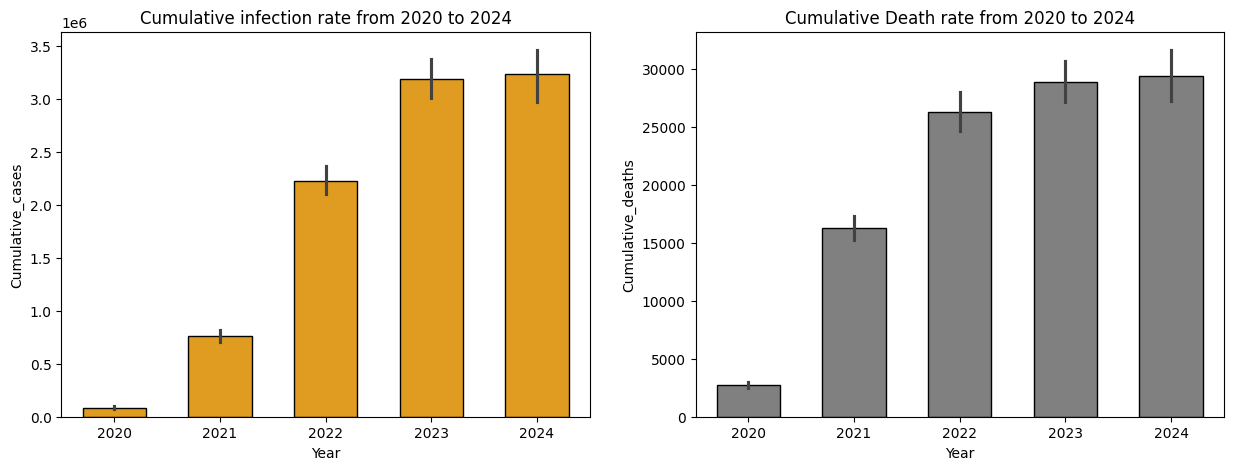

In [22]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
sns.barplot(x = "Year", y = "Cumulative_cases", data = df, color='orange', edgecolor='black', width=0.6)
plt.title("Cumulative infection rate from 2020 to 2024")

plt.subplot(1,2,2)
sns.barplot(x = "Year", y = "Cumulative_deaths", data = df, color='gray', edgecolor='black', width=0.6)
plt.title("Cumulative Death rate from 2020 to 2024")

plt.show()

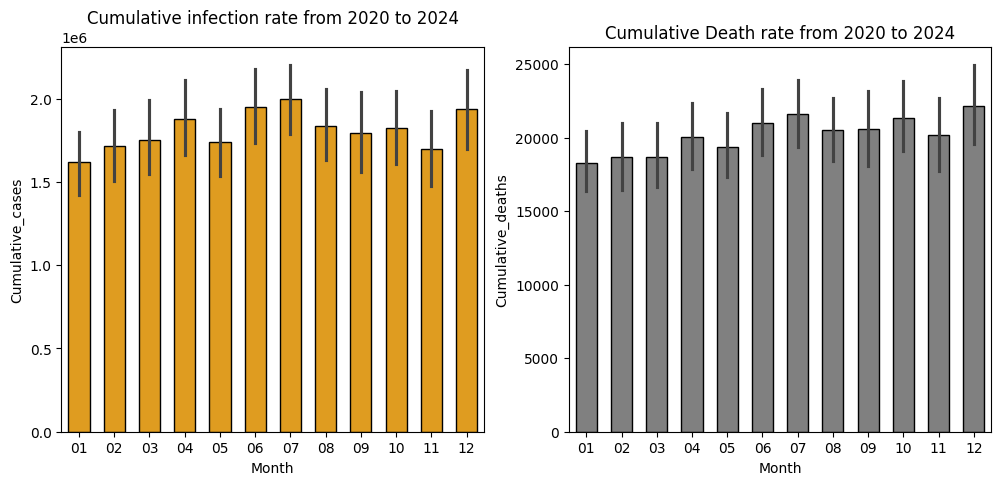

In [24]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x="Month", y="Cumulative_cases", data=df, color='orange', edgecolor='black', width=0.6)
plt.title("Cumulative infection rate from 2020 to 2024")

plt.subplot(1,2,2)
sns.barplot(x="Month", y="Cumulative_deaths", data=df, color='gray', edgecolor='black', width=0.6)
plt.title("Cumulative Death rate from 2020 to 2024")

plt.show()

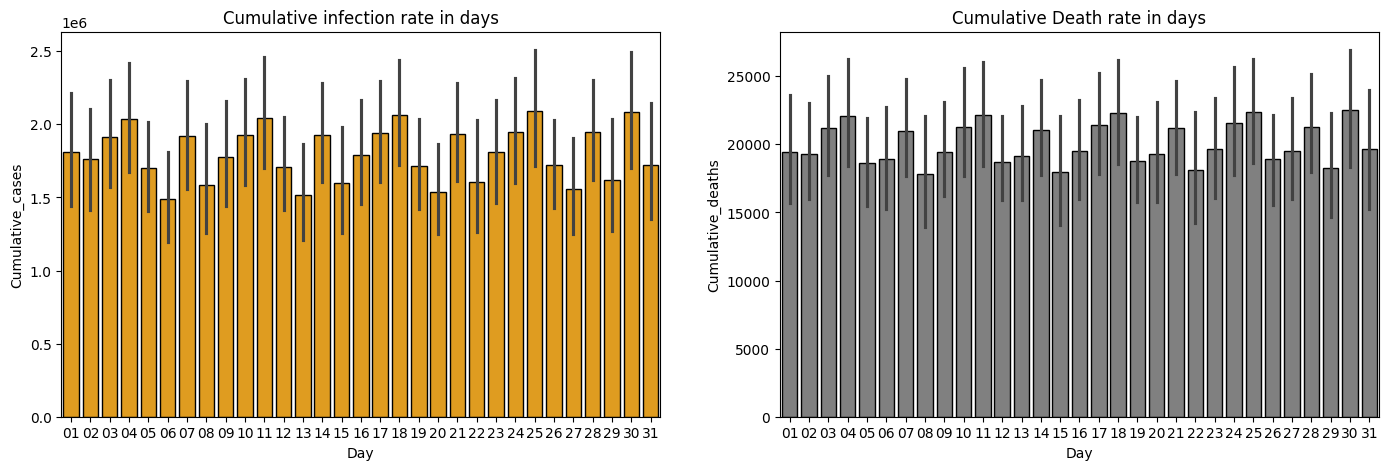

In [34]:
# prompt: generate bar plot with infection rate and death rate in days
df.sort_values(by="Day", inplace=True)

plt.figure(figsize=(17, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=df["Day"], y=df["Cumulative_cases"], color='orange', edgecolor='black')
plt.title("Cumulative infection rate in days")

plt.subplot(1, 2, 2)
sns.barplot(x="Day", y="Cumulative_deaths", data=df, color='gray', edgecolor='black')
plt.title("Cumulative Death rate in days")

plt.show()


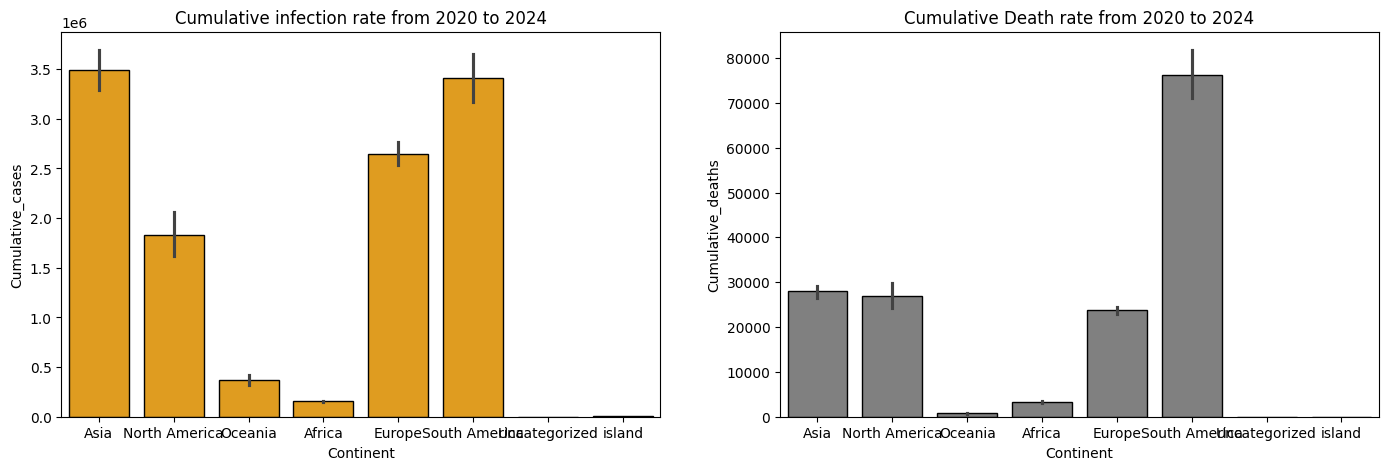

In [35]:
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.barplot(x="Continent", y="Cumulative_cases", data=df, color='orange', edgecolor='black')
plt.title("Cumulative infection rate from 2020 to 2024")

plt.subplot(1,2,2)
sns.barplot(x="Continent", y="Cumulative_deaths", data=df, color='gray', edgecolor='black')
plt.title("Cumulative Death rate from 2020 to 2024")

plt.show()

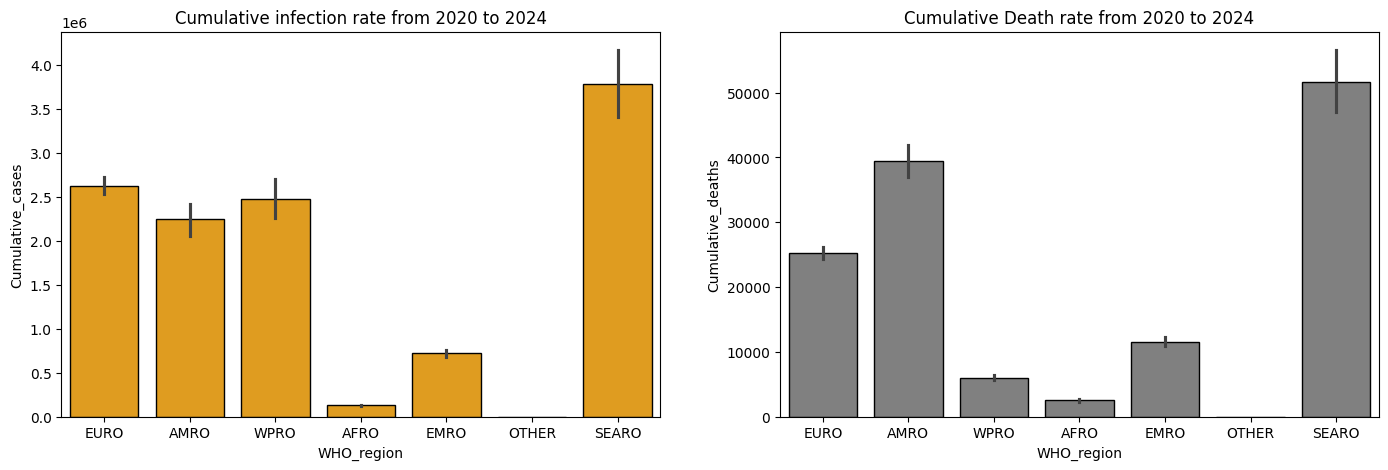

In [36]:
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.barplot(x="WHO_region", y="Cumulative_cases", data=df, color='orange', edgecolor='black')
plt.title("Cumulative infection rate from 2020 to 2024")

plt.subplot(1,2,2)
sns.barplot(x="WHO_region", y="Cumulative_deaths", data=df, color='gray', edgecolor='black')
plt.title("Cumulative Death rate from 2020 to 2024")

plt.show()

# Preprocessing

In [37]:
df = df.drop("Country_code", axis=1)

In [38]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Continent', 'WHO_region',
       'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [46]:
df.sort_index(inplace=True)

# Encoding

In [47]:
encoder = LabelEncoder()

df["Country"] = encoder.fit_transform(df["Country"])
df["Continent"] = encoder.fit_transform(df["Continent"])
df["WHO_region"] = encoder.fit_transform(df["WHO_region"])

In [48]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [49]:
x

,Year,Month,Day,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths
0,2020,01,05,0,1,2,390.0,0,20.0
1,2020,01,12,0,1,2,390.0,0,20.0
2,2020,01,19,0,1,2,390.0,0,20.0
3,2020,01,26,0,1,2,390.0,0,20.0
4,2020,02,02,0,1,2,390.0,0,20.0
...,...,...,...,...,...,...,...,...,...
58555,2024,08,04,238,0,0,1.0,266387,20.0
58556,2024,08,11,238,0,0,390.0,266387,20.0
58557,2024,08,18,238,0,0,390.0,266387,20.0
58558,2024,08,25,238,0,0,390.0,266387,20.0


In [50]:
y

,Cumulative_deaths
0,0
1,0
2,0
3,0
4,0
...,...
58555,5740
58556,5740
58557,5740
58558,5740


# Scaling

In [51]:
scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [52]:
x

array([[0.        , 0.        , 0.13333333, ..., 0.0016149 , 0.        ,
        0.06752871],
       [0.        , 0.        , 0.36666667, ..., 0.0016149 , 0.        ,
        0.06752871],
       [0.        , 0.        , 0.6       , ..., 0.0016149 , 0.        ,
        0.06752871],
       ...,
       [1.        , 0.63636364, 0.56666667, ..., 0.0016149 , 0.00257536,
        0.06752871],
       [1.        , 0.63636364, 0.8       , ..., 0.0016149 , 0.00257536,
        0.06752871],
       [1.        , 0.72727273, 0.        , ..., 0.0016149 , 0.00257536,
        0.06752871]])

In [53]:
y

,Cumulative_deaths
0,0
1,0
2,0
3,0
4,0
...,...
58555,5740
58556,5740
58557,5740
58558,5740


# Train & Test

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
model_1 = LinearRegression()
model_2 = SGDRegressor()
model_3 = Lasso()
model_4 = Ridge()
model_5 = ElasticNet()
model_6 = SVR()
model_7 = KNeighborsRegressor()
model_8 = DecisionTreeRegressor()
model_9 = RandomForestRegressor()
model_10 = BaggingRegressor()
model_11 = ExtraTreesRegressor()
model_12 = AdaBoostRegressor()
model_13 = XGBRegressor()
model_14 = LGBMRegressor()
model_15 = CatBoostRegressor()

In [57]:
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)
model_4.fit(x_train, y_train)
model_5.fit(x_train, y_train)
model_6.fit(x_train, y_train)
model_7.fit(x_train, y_train)
model_8.fit(x_train, y_train)
model_9.fit(x_train, y_train)
model_10.fit(x_train, y_train)
model_11.fit(x_train, y_train)
model_12.fit(x_train, y_train)
model_13.fit(x_train, y_train)
model_14.fit(x_train, y_train)
model_15.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1068
[LightGBM] [Info] Number of data points in the train set: 46848, number of used features: 9
[LightGBM] [Info] Start training from score 20024.489156
Learning rate set to 0.075188
0:	learn: 76475.6497256	total: 86.6ms	remaining: 1m 26s
1:	learn: 71433.0027454	total: 111ms	remaining: 55.3s
2:	learn: 66697.5059984	total: 130ms	remaining: 43.3s
3:	learn: 62327.1617410	total: 150ms	remaining: 37.4s
4:	learn: 58319.2232117	total: 171ms	remaining: 34.1s
5:	learn: 54600.2288267	total: 201ms	remaining: 33.3s
6:	learn: 51247.9319641	total: 230ms	remaining: 32.6s
7:	learn: 48071.6758334	total: 248ms	remaining: 30.8s
8:	learn: 45155.7997734	total: 269ms	remaining: 29.6s
9:	learn: 42424.4455619	total: 287ms	remaining: 28.4s
10:	learn: 39980.5127562	total: 309ms	remaining: 27.7s
11:	learn: 37710.5057499	tot

# ML scores

In [58]:
models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9, model_10, model_11, model_12, model_13, model_14, model_15]
model_names = [
    "LinearRegression",
    "SGDRegressor",
    "Lasso",
    "Ridge",
    "ElasticNet",
    "SVR",
    "KNeighborsRegressor",
    "DecisionTreeRegressor",
    "RandomForestRegressor",
    "BaggingRegressor",
    "ExtraTreesRegressor",
    "AdaBoostRegressor",
    "XGBRegressor",
    "LGBMRegressor",
    "CatBoostRegressor",
]

squared_errors = []
for model, name in zip(models, model_names):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    squared_errors.append(f'{mse * 100:.2f}%')

train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]

rate = []
for train, test in zip(train_score, test_score):
    result = train - test
    rate.append(f'{result * 100:.2f}%')




ratio = []
for train, test in zip(train_score, test_score):
    if train<=0.65 and test<=0.65:
        ratio.append('Bad')

    elif train > test*1.1 or train>=1.00:
      ratio.append('Overfit')

    elif train > 0.65 and train < 0.80 and test > 0.65 and test < 0.80:
      ratio.append('Middle')

    elif train > 0.80 and test > 0.80 and train < 1.00 and test < 1.00:
      ratio.append('Good')

    elif train >= 0.80 and test < 0.80:
      ratio.append('High train, Low test')

    else:
      ratio.append("unknown")



,Model,Train Score,Test Score,Ratio,Evaluate model,Squared Error
0,LinearRegression,1.0,1.0,2.40%,Middle,241987715570.73%
1,SGDRegressor,1.0,1.0,3.13%,unknown,254028534015.27%
2,Lasso,1.0,1.0,2.41%,Middle,242063174944.80%
3,Ridge,1.0,1.0,2.51%,Middle,243200928256.86%
4,ElasticNet,0.0,0.0,0.07%,Bad,681266064415.31%
5,SVR,-0.0,-0.0,0.11%,Bad,732672711115.00%
6,KNeighborsRegressor,1.0,1.0,4.77%,Good,84072554421.77%
7,DecisionTreeRegressor,1.0,1.0,0.13%,Overfit,900356316.16%
8,RandomForestRegressor,1.0,1.0,0.03%,Good,258403543.30%
9,BaggingRegressor,1.0,1.0,0.04%,Good,340873805.96%


In [59]:
model_Score = pd.DataFrame({
    "Model": model_names,
    "Train Score": np.round(train_score, 3),
    "Test Score": np.round(test_score, 3),
    "Ratio": rate,
    'Evaluate model': ratio,
    "Squared Error": squared_errors,
})

model_Score

,Model,Train Score,Test Score,Ratio,Evaluate model,Squared Error
0,LinearRegression,0.676,0.652,2.40%,Middle,241987715570.73%
1,SGDRegressor,0.666,0.634,3.13%,unknown,254028534015.27%
2,Lasso,0.676,0.652,2.41%,Middle,242063174944.80%
3,Ridge,0.675,0.650,2.51%,Middle,243200928256.86%
4,ElasticNet,0.020,0.020,0.07%,Bad,681266064415.31%
5,SVR,-0.053,-0.054,0.11%,Bad,732672711115.00%
6,KNeighborsRegressor,0.927,0.879,4.77%,Good,84072554421.77%
7,DecisionTreeRegressor,1.000,0.999,0.13%,Overfit,900356316.16%
8,RandomForestRegressor,1.000,1.000,0.03%,Good,258403543.30%
9,BaggingRegressor,1.000,1.000,0.04%,Good,340873805.96%


from matplotlib import pyplot as plt
model_Score['Train Score'].plot(kind='hist', bins=20, title='Train Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_Score['Test Score'].plot(kind='hist', bins=20, title='Test Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
model_Score.groupby('Evaluate model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_Score.plot(kind='scatter', x='Train Score', y='Test Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_Score['Train Score'].plot(kind='line', figsize=(8, 4), title='Train Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
model_Score['Test Score'].plot(kind='line', figsize=(8, 4), title='Test Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(model_Score['Evaluate model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_Score, x='Train Score', y='Evaluate model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(model_Score['Evaluate model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_Score, x='Test Score', y='Evaluate model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

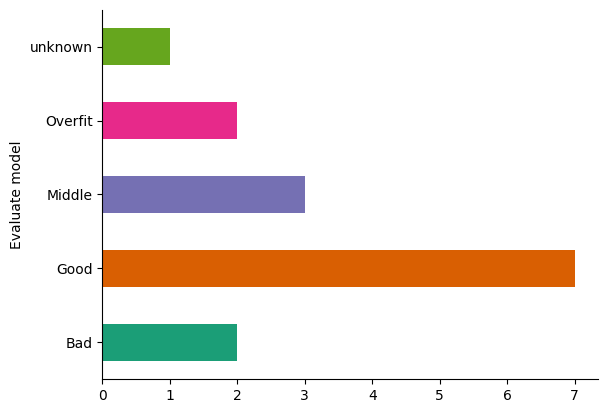

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns
model_Score.groupby('Evaluate model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)